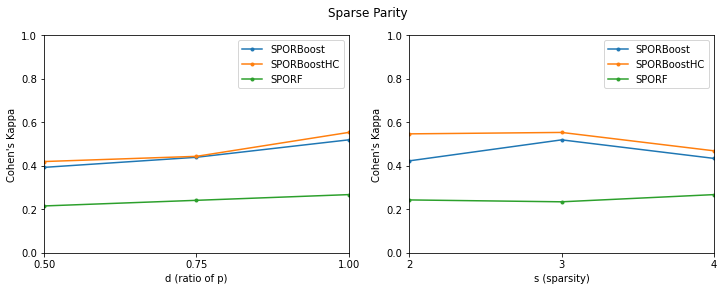

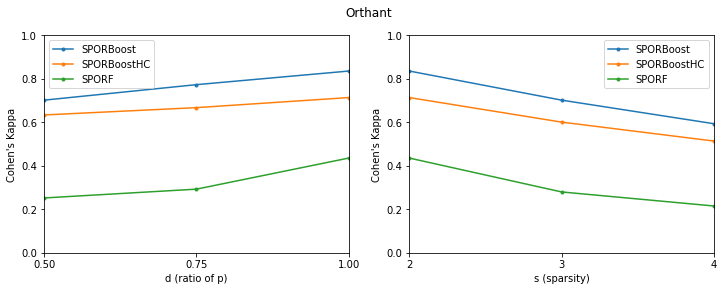

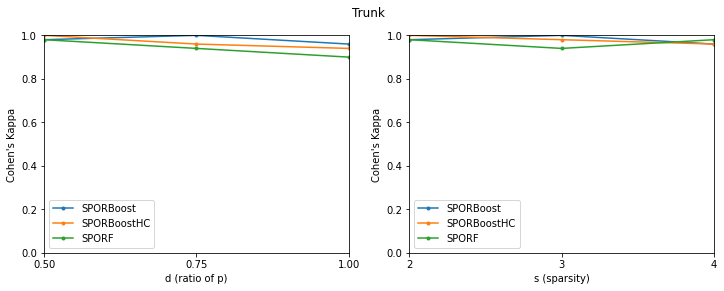

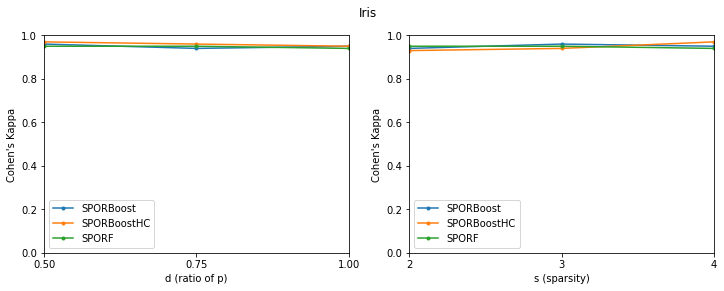

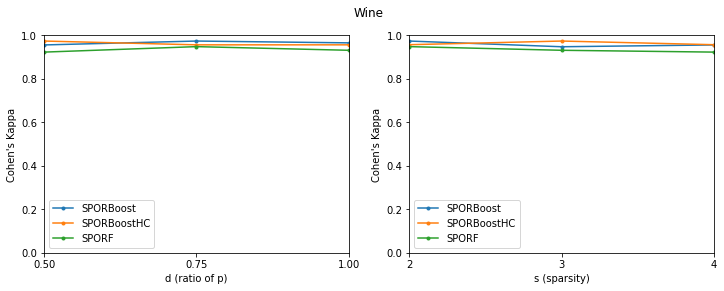

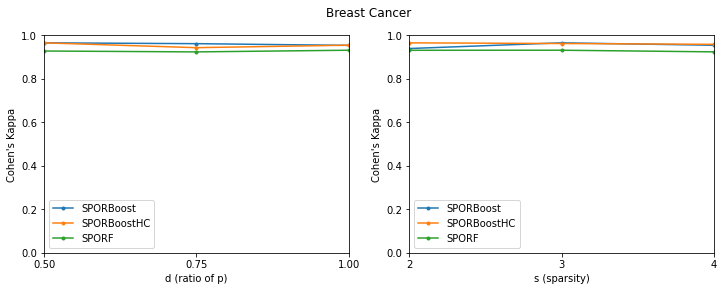

In [90]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def sensitivity_plot(data, label):
        # Read in results for each dataset
        df_all = pd.read_csv(f"report/{data}_all.csv")
        df_best = pd.read_csv(f"report/{data}_best.csv")

        # Filter to sparse models
        df_all = df_all[df_all['param_clf'].isin(['SPORF','SPORBoost','SPORBoostHC'])]
        df_best = df_best[df_best['param_clf'].isin(['SPORF','SPORBoost','SPORBoostHC'])]

        # Column Filter
        cols = ['param_clf',
                'mean_test_cohens_kappa',
                'param_clf__max_depth',
                'param_clf__d_ratio',
                'param_clf__s_ratio'
        ]
        df_all = df_all[cols]
        df_best = df_best[cols].drop(['mean_test_cohens_kappa'], axis=1)

        # Subsets
        # Vary d
        vary_d = df_all.merge(df_best.drop(['param_clf__d_ratio'], axis=1),
                on=['param_clf', 'param_clf__max_depth', 'param_clf__s_ratio'],
                how='inner'
                ) \
        .sort_values(['param_clf','param_clf__d_ratio']).reset_index(drop=True) \
        [['param_clf','param_clf__d_ratio','mean_test_cohens_kappa']]

        # Vary s
        vary_s = df_all.merge(df_best.drop(['param_clf__s_ratio'], axis=1),
                on=['param_clf', 'param_clf__max_depth', 'param_clf__d_ratio'],
                how='inner'
                ) \
        .sort_values(['param_clf','param_clf__s_ratio']).reset_index(drop=True) \
        [['param_clf','param_clf__s_ratio','mean_test_cohens_kappa']]

        # Generate Plots
        fig, (axd, axs) = plt.subplots(1, 2)
        fig.suptitle(label)

        # //////////////////////////////////////////////////////////////////////////////
        # //////////////////////////////////////////////////////////////////////////////
        # //////////////////////////////////////////////////////////////////////////////
        clf = vary_d.param_clf.unique()
        d_range = vary_d.param_clf__d_ratio.unique()
        
        # plot lines
        for c in clf:
                axd.plot(d_range, vary_d[vary_d.param_clf == c].mean_test_cohens_kappa,
                        label = c, marker='.')

        axd.legend()
        axd.set_xlim([d_range.min(), d_range.max()])
        axd.set_ylim([0, 1])
        axd.set_xticks(np.sort(d_range))
        axd.set_xlabel('d (ratio of p)')
        axd.set_ylabel('Cohen\'s Kappa')

        # //////////////////////////////////////////////////////////////////////////////
        # //////////////////////////////////////////////////////////////////////////////
        # //////////////////////////////////////////////////////////////////////////////
        clf = vary_s.param_clf.unique()
        s_range = vary_s.param_clf__s_ratio.unique()
        
        # plot lines
        for c in clf:
                axs.plot(s_range, vary_s[vary_s.param_clf == c].mean_test_cohens_kappa,
                        label = c, marker='.')

        axs.legend()
        axs.set_xlim([s_range.min(), s_range.max()])
        axs.set_ylim([0, 1])
        axs.set_xticks(np.sort(s_range))
        axs.set_xlabel('s (sparsity)')
        axs.set_ylabel('Cohen\'s Kappa')

        fig.set_figheight(4)
        fig.set_figwidth(12)
        fig.savefig(f"report/plt_sens_{data}.png", dpi=400)

sensitivity_plot("sparse_parity", "Sparse Parity")
sensitivity_plot("orthant", "Orthant")
sensitivity_plot("trunk", "Trunk")
sensitivity_plot("iris", "Iris")
sensitivity_plot("wine", "Wine")
sensitivity_plot("breast_cancer", "Breast Cancer")
